In [2]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.io import fits

In [3]:
from synphot import units, SourceSpectrum, Empirical1D, Observation

from synphot import SpectralElement

v = SourceSpectrum.from_vega()

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

In [9]:
paths = ['lte058.0-4.5-0.0a+0.0.BT-Settl.spec.fits']
wavelength = (fits.getdata(paths[0])['Wavelength'] * u.um).to(u.Angstrom)
hdu = fits.open(paths[0])

In [10]:
flux = hdu[1].data['Flux'] * u.W / u.m**2 / u.um 

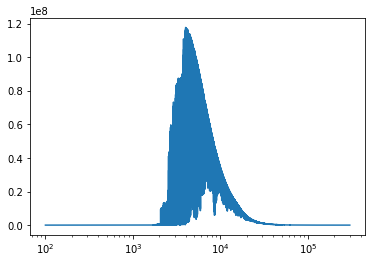

In [11]:
plt.semilogx(wavelength, flux)

In [12]:
f = units.convert_flux(wavelength, flux, units.FLAM, vegaspec=v)

In [13]:
bp_b = SpectralElement.from_file('GAIA_GAIA2.Gbp.dat.txt')
bp_r = SpectralElement.from_file('GAIA_GAIA2.Grp.dat.txt')

sp = SourceSpectrum(Empirical1D, points=wavelength, lookup_table=f)

force = 'taper'
obs_b = Observation(sp, bp_b, force=force)
obs_r = Observation(sp, bp_r, force=force)

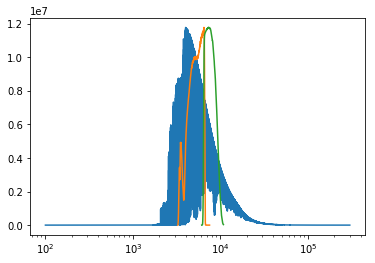

In [14]:
plt.semilogx(wavelength.to(u.Angstrom), f)
plt.semilogx(bp_b.model.points[0], bp_b.model.lookup_table * np.max(f))
plt.semilogx(bp_r.model.points[0], bp_r.model.lookup_table * np.max(f))

In [15]:
obs_b.effstim('vegamag', vegaspec=v) - obs_r.effstim('vegamag', vegaspec=v)

<Quantity 3.2956388824074807 VEGAMAG>

Measured B-R from Gaia for 51 Peg: 0.8170